SIN-392 - Introduction to Digital Image Processing (2023-1)

# Lecture 01 - Introduction to digital image processing

Prof. João Fernando Mari ([*joaofmari.github.io*](https://joaofmari.github.io/))

---

# *The Radon Transform*

* Exemplo baseado em [1]

---

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import skimage
from skimage import data, transform 

### %matplotlib notebook

In [2]:
skimage.__version__

'0.22.0'

## The Forward transform

In [3]:
# The Shepp-Logan Phantom (uncomment to use)
# ----------------------
image = data.shepp_logan_phantom()
print(image.shape)
# Reduces image size to 40% of its original size
image = transform.rescale(image, scale=0.4, mode='reflect')
print(image.shape)

# An artificial image (uncomment to use)
# -----------------
# image = plt.imread('./images/corpo_02_ok.png')
# print(image.shape)

(400, 400)
(160, 160)


Number of angles (samples): 160
(160, 160)


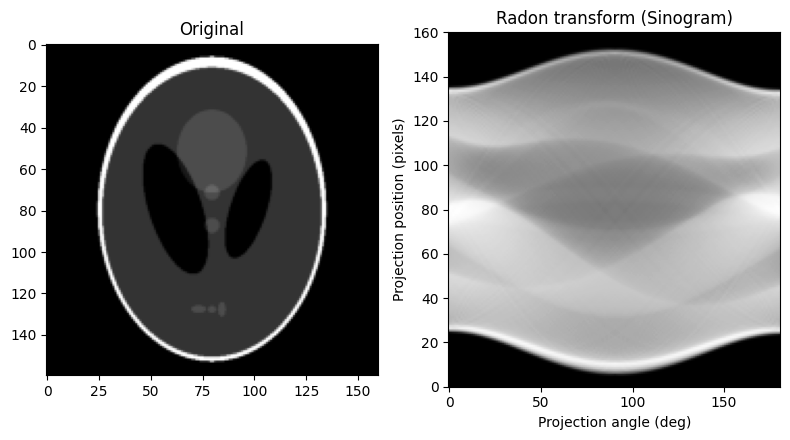

In [4]:
# Number of sampled angles
# (The number of acquisitions can be estimated from the number of pixels in the image)
num_angles = max(image.shape) // 1 # The divider determines the reduction in acquisition resolution
### num_angles = 8 
print(f'Number of angles (samples): {num_angles}')

# Sets the angles at which the sample will be imaged
theta = np.linspace(0., 180., int(num_angles), endpoint=False)

# Build the sinogram using the Radon transform
sinogram = transform.radon(image, theta=theta)
print(sinogram.shape)

dx, dy = 0.5 * 180.0 / num_angles, 0.5 / sinogram.shape[0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(image, cmap='gray')

ax2.set_title("Radon transform (Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')

fig.tight_layout()
plt.show()

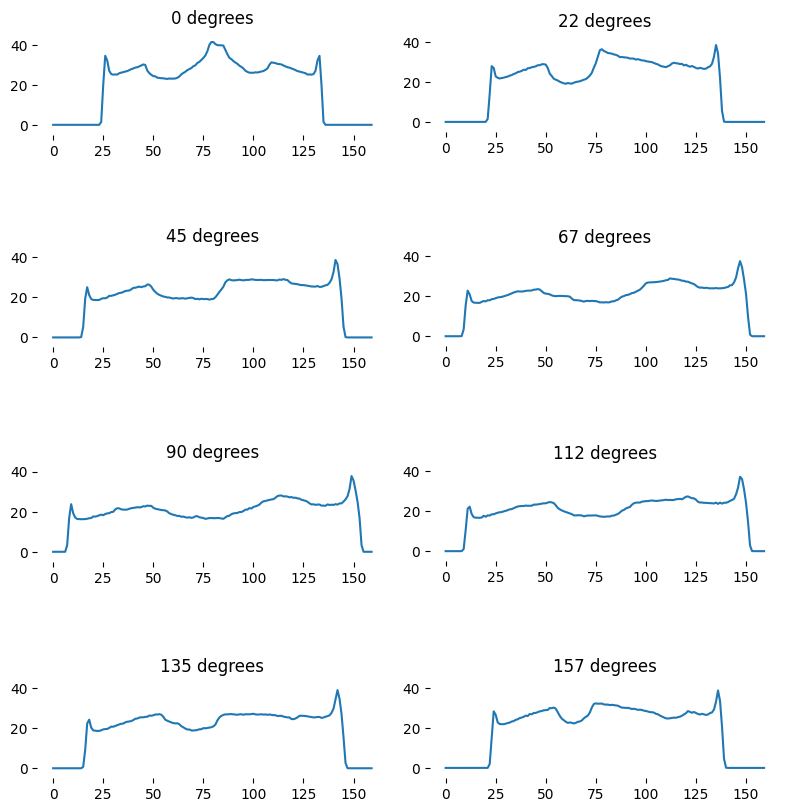

In [5]:
fig, ax = plt.subplots(4, 2, figsize=(8, 9))
### plt.style.use('dark_background')

for i, j in enumerate(np.linspace(0, num_angles, 8, endpoint=False).astype(int)):
    # print(i)
    ax[i//2, i%2].set_title(f'{int(j/num_angles*180)} degrees')
    ax[i//2, i%2].plot(sinogram[:,j])
    #ax[i//2, i%2].axis('equal')
    ax[i//2, i%2].set_aspect('equal')
    ax[i//2, i%2].set_ylim(-5, sinogram[:,j].max() + 5)
    ax[i//2, i%2].set_frame_on(False)
    
fig.tight_layout()
plt.show()

## Reconstruction using Filtered Back Projection (FBP)

FBP rms reconstruction error: 0.0283


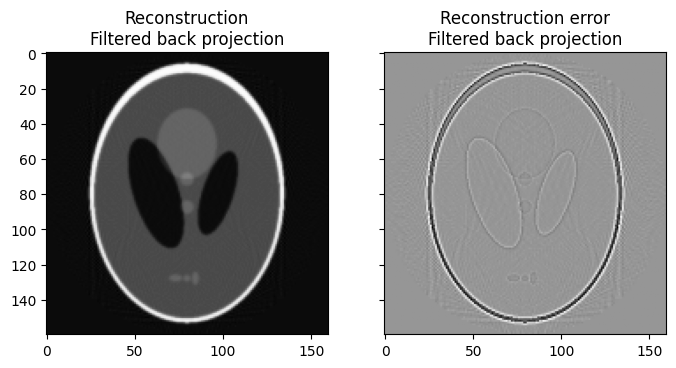

In [6]:
# Inverse Radon Transform
# (reconstructs the original image from the projections)
reconstruction_fbp = transform.iradon(sinogram, theta=theta, filter_name='ramp')

# Compute the error between the reconstruction and the original image.
error = reconstruction_fbp - image
print(f'FBP rms reconstruction error: {np.sqrt(np.mean(error**2)):.3g}')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5), sharex=True, sharey=True)
ax1.set_title("Reconstruction\nFiltered back projection")
ax1.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
ax2.set_title("Reconstruction error\nFiltered back projection")
ax2.imshow(reconstruction_fbp - image, cmap=plt.cm.Greys_r, vmin=-0.2, vmax=0.2)
plt.show()

## Bibliography
---

1. Radom Transform
    * https://scikit-image.org/docs/stable/auto_examples/transform/plot_radon_transform.html